### Agenda

- MNIST Data
- Model Architecture
- Model Training
- Model Inference/Prediction

### MNIST Data

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('MNIST_data/train.csv')
test = pd.read_csv('MNIST_data/test.csv')

In [27]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data_y = data['label'].values
data_x = data.drop('label', axis=1)

In [19]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


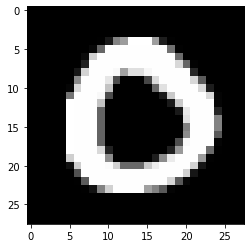

In [31]:
img = data_x.iloc[4].values.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.show()

In [32]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### Model Architecture

In [37]:
model = keras.Sequential([
        keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),    
        keras.layers.Dense(10, activation=tf.nn.softmax)])

2023-01-07 20:50:13.448582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


### Train the Model

In [42]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.1, random_state=42)
model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
1182/1182 [==============================] - 3s 2ms/step - loss: 1.3424 - accuracy: 0.8567 - val_loss: 0.4040 - val_accuracy: 0.9090
Epoch 2/5
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2924 - accuracy: 0.9266 - val_loss: 0.2688 - val_accuracy: 0.9269
Epoch 3/5
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2169 - accuracy: 0.9410 - val_loss: 0.2306 - val_accuracy: 0.9369
Epoch 4/5
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1691 - accuracy: 0.9520 - val_loss: 0.2255 - val_accuracy: 0.9374
Epoch 5/5
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1398 - accuracy: 0.9599 - val_loss: 0.1894 - val_accuracy: 0.9507


### Model the prediction

In [43]:
model.predict(test).argmax(axis=1)

875/875 [==============================] - 1s 874us/step


array([2, 0, 9, ..., 3, 9, 2])

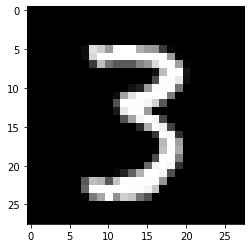

In [49]:
img = test.iloc[-3].values.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.show()